# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv
import random
from citipy import citipy

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city.capitalize())

# Print the city count to confirm sufficient count
len(cities)

cities_data = pd.DataFrame({"City":cities}) 
cities_data = cities_data.drop_duplicates('City')
cities_data.head()

,City
0,Vaini
1,Albany
2,Mataura
3,Sao filipe
4,Jiangyou


In [3]:
cities_data["Lat"] = ""
cities_data["Lon"] = ""
cities_data["Date"] = ""
cities_data["Temp"] = ""
cities_data["Humidity"] = ""
cities_data["Cloudiness"] = ""
cities_data["Windspeed"] = ""

cities_data.head()

,City,Lat,Lon,Date,Temp,Humidity,Cloudiness,Windspeed
0,Vaini,,,,,,,
1,Albany,,,,,,,
2,Mataura,,,,,,,
3,Sao filipe,,,,,,,
4,Jiangyou,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Set the initial row count to zero
row_count = 0

print("Beginning retrieval")

# Loop through the cities and perform API Calls
for index, row in cities_data.iterrows():
    target_url = "http://api.openweathermap.org/data/2.5/weather?q=%s&units=IMPERIAL&appid=%s" %(row["City"], api_key)
    response = requests.get(target_url).json()
    print("Now retrieving city #%s: %s" % (row_count + 1, cities_data.loc[index]["City"]))
    print(target_url)
    row_count += 1
    
    try:     
        cities_data.set_value(index, "Lat", response["coord"]["lat"])
        cities_data.set_value(index, "Lon", response["coord"]["lon"])
        cities_data.set_value(index, "Date", response["dt"])
        cities_data.set_value(index, "Humidity", response["main"]["humidity"])
        cities_data.set_value(index, "Temp", response["main"]["temp"])
        cities_data.set_value(index, "Windspeed", response["wind"]["speed"])
        cities_data.set_value(index, "Cloudiness", response["clouds"]["all"])
           
    except:
        print("Missing city... skip.")
        
print("Data retrieval done")

Beginning retrieval
Now retrieving city #1: Vaini
http://api.openweathermap.org/data/2.5/weather?q=Vaini&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #2: Albany
http://api.openweathermap.org/data/2.5/weather?q=Albany&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7


/Users/MonishaJain/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
/Users/MonishaJain/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
/Users/MonishaJain/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/MonishaJain/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/MonishaJain/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: s

Now retrieving city #3: Mataura
http://api.openweathermap.org/data/2.5/weather?q=Mataura&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #4: Sao filipe
http://api.openweathermap.org/data/2.5/weather?q=Sao filipe&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #5: Jiangyou
http://api.openweathermap.org/data/2.5/weather?q=Jiangyou&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #6: Nouadhibou
http://api.openweathermap.org/data/2.5/weather?q=Nouadhibou&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #7: Coulommiers
http://api.openweathermap.org/data/2.5/weather?q=Coulommiers&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #8: Bluff
http://api.openweathermap.org/data/2.5/weather?q=Bluff&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #9: Ushuaia
http://api.openweathermap.org/data/2.5/weather?q=Ushuaia&units=IMPERIAL&appid=9955cd7e0e62f2

Now retrieving city #58: Ilhabela
http://api.openweathermap.org/data/2.5/weather?q=Ilhabela&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #59: Klaksvik
http://api.openweathermap.org/data/2.5/weather?q=Klaksvik&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #60: Shache
http://api.openweathermap.org/data/2.5/weather?q=Shache&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #61: Mumford
http://api.openweathermap.org/data/2.5/weather?q=Mumford&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #62: Walvis bay
http://api.openweathermap.org/data/2.5/weather?q=Walvis bay&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #63: Yellowknife
http://api.openweathermap.org/data/2.5/weather?q=Yellowknife&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #64: Taolanaro
http://api.openweathermap.org/data/2.5/weather?q=Taolanaro&units=IMPERIAL&appid=9955c

Now retrieving city #113: San patricio
http://api.openweathermap.org/data/2.5/weather?q=San patricio&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #114: Sinnamary
http://api.openweathermap.org/data/2.5/weather?q=Sinnamary&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #115: Punta arenas
http://api.openweathermap.org/data/2.5/weather?q=Punta arenas&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #116: Vestbygda
http://api.openweathermap.org/data/2.5/weather?q=Vestbygda&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Missing city... skip.
Now retrieving city #117: Szurdokpuspoki
http://api.openweathermap.org/data/2.5/weather?q=Szurdokpuspoki&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #118: San buenaventura
http://api.openweathermap.org/data/2.5/weather?q=San buenaventura&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #119: Moscow
http://api.open

Now retrieving city #168: Jablah
http://api.openweathermap.org/data/2.5/weather?q=Jablah&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #169: Balikpapan
http://api.openweathermap.org/data/2.5/weather?q=Balikpapan&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #170: Harper
http://api.openweathermap.org/data/2.5/weather?q=Harper&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #171: Los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?q=Los llanos de aridane&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #172: Aksu
http://api.openweathermap.org/data/2.5/weather?q=Aksu&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #173: Caarapo
http://api.openweathermap.org/data/2.5/weather?q=Caarapo&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #174: Cabedelo
http://api.openweathermap.org/data/2.5/weather?q=Cabedelo&units=IMPERIA

Now retrieving city #223: Bafq
http://api.openweathermap.org/data/2.5/weather?q=Bafq&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #224: Meyungs
http://api.openweathermap.org/data/2.5/weather?q=Meyungs&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Missing city... skip.
Now retrieving city #225: Santiago del estero
http://api.openweathermap.org/data/2.5/weather?q=Santiago del estero&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #226: Porto-vecchio
http://api.openweathermap.org/data/2.5/weather?q=Porto-vecchio&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #227: Qidong
http://api.openweathermap.org/data/2.5/weather?q=Qidong&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #228: Turukhansk
http://api.openweathermap.org/data/2.5/weather?q=Turukhansk&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #229: Takoradi
http://api.openweathermap.org/data/2.5/

Now retrieving city #277: Beira
http://api.openweathermap.org/data/2.5/weather?q=Beira&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #278: Tatarsk
http://api.openweathermap.org/data/2.5/weather?q=Tatarsk&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #279: Cockburn harbour
http://api.openweathermap.org/data/2.5/weather?q=Cockburn harbour&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Missing city... skip.
Now retrieving city #280: Kikwit
http://api.openweathermap.org/data/2.5/weather?q=Kikwit&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #281: Maturin
http://api.openweathermap.org/data/2.5/weather?q=Maturin&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #282: Sobolevo
http://api.openweathermap.org/data/2.5/weather?q=Sobolevo&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #283: Chipinge
http://api.openweathermap.org/data/2.5/weather?q=Chipinge&u

Now retrieving city #333: Geraldton
http://api.openweathermap.org/data/2.5/weather?q=Geraldton&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #334: Lavrentiya
http://api.openweathermap.org/data/2.5/weather?q=Lavrentiya&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #335: Panara
http://api.openweathermap.org/data/2.5/weather?q=Panara&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #336: Buzmeyin
http://api.openweathermap.org/data/2.5/weather?q=Buzmeyin&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #337: Alofi
http://api.openweathermap.org/data/2.5/weather?q=Alofi&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #338: Port macquarie
http://api.openweathermap.org/data/2.5/weather?q=Port macquarie&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #339: San quintin
http://api.openweathermap.org/data/2.5/weather?q=San quintin&units=IMPER

Now retrieving city #389: Kichera
http://api.openweathermap.org/data/2.5/weather?q=Kichera&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #390: Bairiki
http://api.openweathermap.org/data/2.5/weather?q=Bairiki&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Missing city... skip.
Now retrieving city #391: Gangotri
http://api.openweathermap.org/data/2.5/weather?q=Gangotri&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Missing city... skip.
Now retrieving city #392: Qaqortoq
http://api.openweathermap.org/data/2.5/weather?q=Qaqortoq&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #393: Raduzhnyy
http://api.openweathermap.org/data/2.5/weather?q=Raduzhnyy&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #394: Khatanga
http://api.openweathermap.org/data/2.5/weather?q=Khatanga&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #395: Srivardhan
http://api.openweathermap.org/data/2.5/

Now retrieving city #444: Saint-pierre
http://api.openweathermap.org/data/2.5/weather?q=Saint-pierre&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #445: Meulaboh
http://api.openweathermap.org/data/2.5/weather?q=Meulaboh&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #446: Tshikapa
http://api.openweathermap.org/data/2.5/weather?q=Tshikapa&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #447: Bastrop
http://api.openweathermap.org/data/2.5/weather?q=Bastrop&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #448: Sorong
http://api.openweathermap.org/data/2.5/weather?q=Sorong&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #449: Mount rainier
http://api.openweathermap.org/data/2.5/weather?q=Mount rainier&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #450: Saldanha
http://api.openweathermap.org/data/2.5/weather?q=Saldanha&units=IMPERIA

Now retrieving city #502: Vardo
http://api.openweathermap.org/data/2.5/weather?q=Vardo&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #503: Chicama
http://api.openweathermap.org/data/2.5/weather?q=Chicama&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #504: Gaya
http://api.openweathermap.org/data/2.5/weather?q=Gaya&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #505: Pangoa
http://api.openweathermap.org/data/2.5/weather?q=Pangoa&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #506: Mozarlandia
http://api.openweathermap.org/data/2.5/weather?q=Mozarlandia&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #507: Severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?q=Severo-kurilsk&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #508: Chapais
http://api.openweathermap.org/data/2.5/weather?q=Chapais&units=IMPERIAL&appid=9955cd7e

Now retrieving city #558: Tomatlan
http://api.openweathermap.org/data/2.5/weather?q=Tomatlan&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #559: Lanzhou
http://api.openweathermap.org/data/2.5/weather?q=Lanzhou&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #560: Frederico westphalen
http://api.openweathermap.org/data/2.5/weather?q=Frederico westphalen&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #561: Provideniya
http://api.openweathermap.org/data/2.5/weather?q=Provideniya&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #562: Petropavlovsk-kamchatskiy
http://api.openweathermap.org/data/2.5/weather?q=Petropavlovsk-kamchatskiy&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #563: Klyuchi
http://api.openweathermap.org/data/2.5/weather?q=Klyuchi&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #564: Ogawara
http://api.openweatherma

Now retrieving city #613: Sangar
http://api.openweathermap.org/data/2.5/weather?q=Sangar&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #614: Tshane
http://api.openweathermap.org/data/2.5/weather?q=Tshane&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #615: Casteldaccia
http://api.openweathermap.org/data/2.5/weather?q=Casteldaccia&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Now retrieving city #616: Aloleng
http://api.openweathermap.org/data/2.5/weather?q=Aloleng&units=IMPERIAL&appid=9955cd7e0e62f2e52eb85e50105ffdf7
Data retrieval done


In [9]:
cities_data["Date"] = pd.to_datetime(cities_data["Date"], unit='s')
lat = cities_data["Lat"]
lon = cities_data["Lon"]
date = cities_data["Date"]
temp = cities_data["Temp"]
humidity = cities_data["Humidity"]
cloudiness = cities_data["Cloudiness"]
windspeed = cities_data["Windspeed"]

cities_data = cities_data.dropna(axis=0, how='any')
cities_data.head()

,City,Lat,Lon,Date,Temp,Humidity,Cloudiness,Windspeed
0,Vaini,15.34,74.49,2018-10-04 00:39:25,67.62,95,8,2.48
1,Albany,42.65,-73.75,2018-10-03 23:54:00,58.53,86,20,1.92
2,Mataura,-46.19,168.86,2018-10-04 00:39:26,50.34,95,92,14.45
3,Sao filipe,14.9,-24.5,2018-10-04 00:39:26,79.86,93,0,13.67
4,Jiangyou,31.78,104.73,2018-10-04 00:39:26,51.96,81,68,3.15


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
cities_data.to_csv("cities_data.csv", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

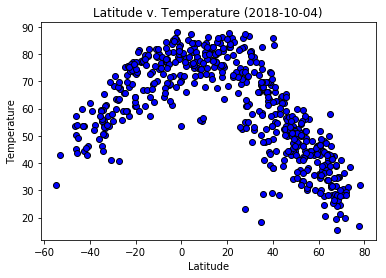

In [11]:
plt.scatter(lat, temp, marker="o", facecolors="blue", edgecolors="black", alpha = 1)
plt.title("Latitude v. Temperature (2018-10-04)")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.savefig("Latitude v. Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

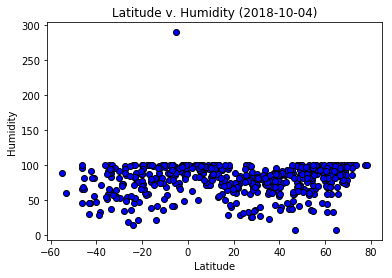

In [14]:
plt.scatter(lat, humidity, marker="o", facecolors="blue", edgecolors="black", alpha = 1)
plt.title("Latitude v. Humidity (2018-10-04)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Latitude v. Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

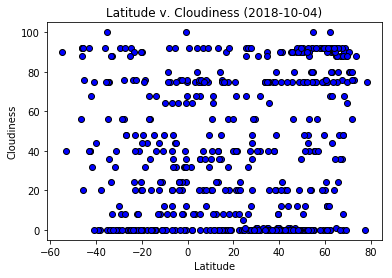

In [12]:
plt.scatter(lat, cloudiness, marker="o", facecolors="blue", edgecolors="black", alpha = 1)
plt.title("Latitude v. Cloudiness (2018-10-04)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Latitude v. Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

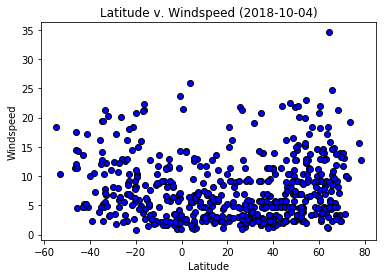

In [13]:
plt.scatter(lat, windspeed, marker="o", facecolors="blue", edgecolors="black", alpha = 1)
plt.title("Latitude v. Windspeed (2018-10-04)")
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.savefig("Latitude v. Windspeed.png")
plt.show()